In [3]:
pip install ultralytics opencv-python matplotlib

  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



0: 384x640 8 persons, 1 bicycle, 2 buss, 1 truck, 1 traffic light, 438.3ms
Speed: 13.8ms preprocess, 438.3ms inference, 34.8ms postprocess per image at shape (1, 3, 384, 640)
Detected objects: {'bus': 2, 'person': 6, 'bicycle': 1, 'truck': 1}
Output image saved to: output_detected.jpg


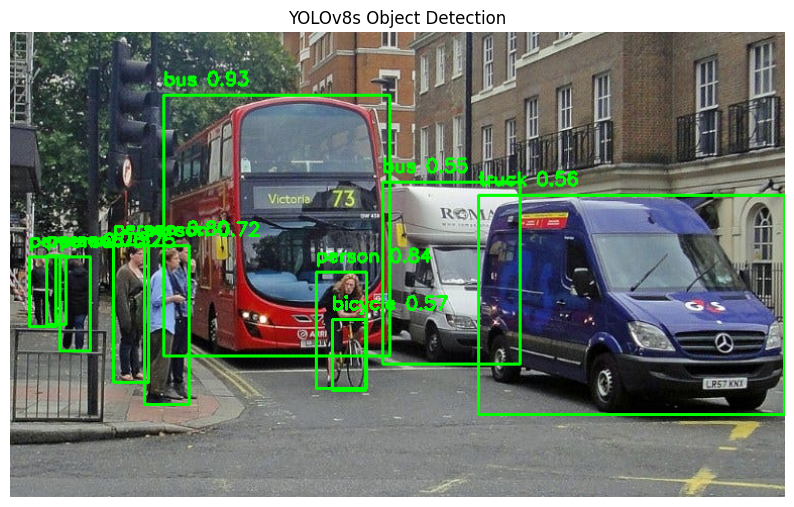

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
from collections import Counter

# Load YOLOv8s model (better accuracy than 'n')
model = YOLO("yolov8s.pt")

# Set image path
image_path = "image.jpg"  # <-- Replace with your actual image filename

# Check file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Read image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Failed to read image. Check file format or path.")

# Run detection
results = model(image)[0]

# For object count
detected_labels = []

# Loop through detected boxes
for i, box in enumerate(results.boxes):
    conf = float(box.conf[0])
    if conf < 0.5:
        continue  # skip low confidence predictions

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    label = model.names[cls_id]

    # Save label for counting
    detected_labels.append(label)

    # Draw bounding box and label
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Save cropped object
    cropped_object = image[y1:y2, x1:x2]
    cv2.imwrite(f"cropped_{label}_{i}.jpg", cropped_object)

    # Optional: Sound alert if a person is detected (Windows only)
    if label == "person":
        try:
            import winsound
            winsound.Beep(1000, 400)  # Beep sound
        except:
            pass  # Ignore if not on Windows

# Print object counts
object_counts = Counter(detected_labels)
print("Detected objects:", dict(object_counts))

# Save the output image
output_path = "output_detected.jpg"
cv2.imwrite(output_path, image)
print(f"Output image saved to: {output_path}")

# Show image using matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("YOLOv8s Object Detection")
plt.show()
